## Polynomial Linear Regression is still considered a type of linear regression because, despite the presence of polynomial terms (like x^2, x^3,…), the model is linear in the parameters (coefficients).

Here's what that means:  
In simple linear regression, the model is:  
    y = beta_0 + beta_1 * x  
In polynomial linear regression of degree 2, for example, the model becomes:  
    y = beta_0 + beta_1 * x + beta_2 * x^2  

Despite the input x being raised to powers, the equation is still linear in terms of the coefficients beta_0, beta_1, beta_2. That’s why it falls under the umbrella of linear regression.  

**Key point:**
Linear regression means "linear in coefficients," not necessarily in features.

**Summary:**

✅ Linear in coefficients: OK for linear regression.  
❌ Nonlinear in coefficients: Not linear regression.  
✅ Nonlinear in features (like using x², log x): Still linear regression if coefficients are combined linearly.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

## Single Polynomial Linear Regression

In [76]:
np.random.seed(43)
X = 6 * np.random.rand(200, 1) - 3
y = 0.3 * X**2 + 0.9 * X + 5 + np.random.randn(200, 1)
# y = 0.3 X^2 + 0.9 X + 5 + Noise

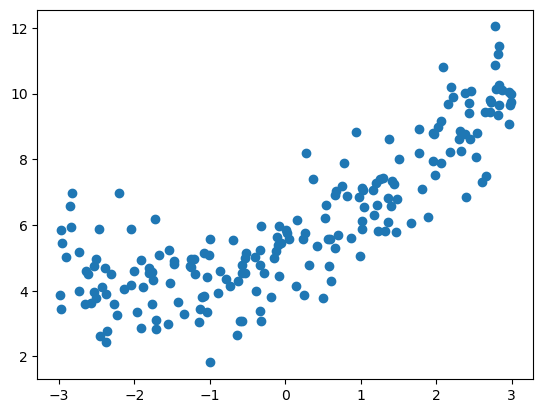

In [3]:
plt.scatter(X, y)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)

In [5]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [6]:
lr.intercept_, lr.coef_

(array([5.99952208]), array([[1.01040643]]))

In [7]:
y_pred = lr.predict(X_test)

In [8]:
r2_score(y_test, y_pred)

0.7242973285489679

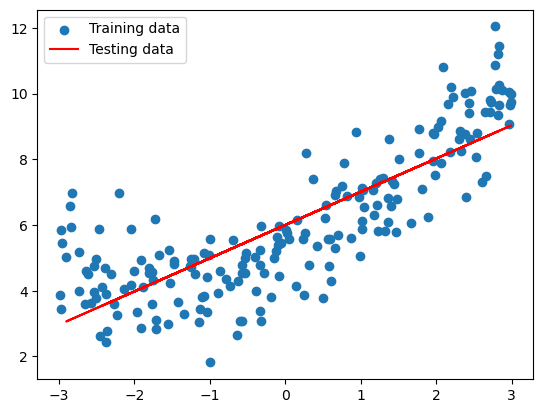

In [9]:
plt.scatter(X, y, label="Training data")
plt.plot(X_test, y_pred, 'r', label="Testing data")
plt.legend()
plt.show()

In [10]:
# lets try polynomial reg
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [11]:
lr2 = LinearRegression()
lr2.fit(X_train_trans, y_train)

LinearRegression()

In [12]:
y_pred2 = lr2.predict(X_test_trans)

In [13]:
r2_score(y_test, y_pred2)

0.8326312702887827

In [14]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_trans = poly.transform(X_new)
y_new = lr2.predict(X_new_trans)

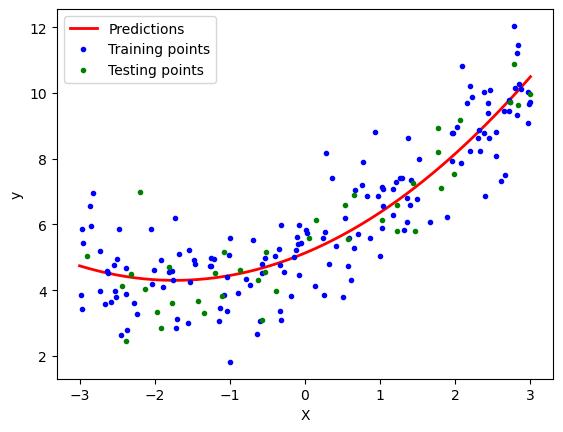

In [62]:
plt.plot(X_new, y_new, 'r-', label="Predictions", linewidth=2)
plt.plot(X_train, y_train, 'b.', label="Training points")
# plt.plot(X_test, y_pred2, 'g.', label="Testing points")
plt.plot(X_test, y_test, 'g.', label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(X_test, y_pred2, 'g', label="Testing points")  
This line draws a line plot of the test inputs X_test against the predicted outputs y_pred2 using green color ('g').  

Why it should not form a smooth curve:  
• X_test is a random sample, not ordered — it was created using train_test_split, which shuffles the data.  
• Since the data points are not sorted, connecting them with lines results in a jagged, non-smooth plot, not a proper curve.  

In [71]:
def polynomial_reg(deg):
    np.random.seed(43)
    X = 6 * np.random.rand(300, 1) - 3
    y = 0.3 * X**2 + 0.9 * X + 5 + np.random.randn(300, 1)
    
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    # X_new_trans = poly.transform(X_new)

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    std_sclr = StandardScaler()
    lr_model = LinearRegression()

    pipe = Pipeline(
        steps=[
            ("poly_features", poly_features),
            ("standardization", std_sclr),
            ("lin_reg", lr_model)
        ],
        verbose=True
    )
    
    pipe.fit(X, y)
    y_new_pred = pipe.predict(X_new)
    t = pipe.get_params()["steps"][2][1]
    # print(f"Intercept={t.intercept_}\nCoef={t.coef_}")
    
    # plot
    plt.plot(X_new, y_new_pred, "r-", label="Predictions")
    plt.plot(X, y, 'b.', label="Training points")
    plt.legend()
    plt.show()

[Pipeline] ..... (step 1 of 3) Processing poly_features, total=   0.0s
[Pipeline] ... (step 2 of 3) Processing standardization, total=   0.0s
[Pipeline] ........... (step 3 of 3) Processing lin_reg, total=   0.0s


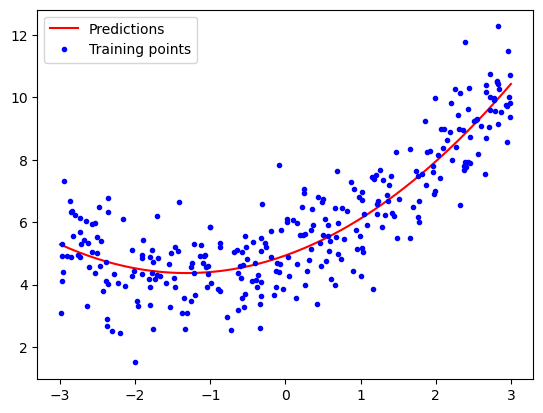

In [75]:
# if the degree is too high, the model may overfit to the data
# if the degree is too low, the model may underfit
polynomial_reg(2)

### Using SGD Regressor

In [102]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.3 * X**2 + 0.9 * X + 5 + np.random.randn(200, 1)
# y = 0.3 X^2 + 0.9 X + 5 + Noise

In [103]:
poly = PolynomialFeatures(degree=2)
X_trans = poly.fit_transform(X)

In [104]:
sgd_reg = SGDRegressor(max_iter=1000, learning_rate="constant", eta0=0.01)
sgd_reg.fit(X_trans, y.ravel())

SGDRegressor(learning_rate='constant')

In [105]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_trans = poly.transform(X_new)
y_new_pred = sgd_reg.predict(X_new_trans)

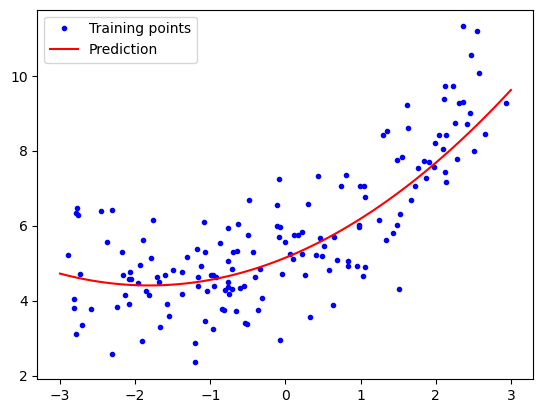

In [107]:
plt.plot(X_train, y_train, "b.", label="Training points")
plt.plot(X_new, y_new_pred, 'r-', label="Prediction")
plt.legend(loc="upper left")
plt.show()

## Multiple Polynomial Linear Regression

In [108]:
# we will have 2 input features/columns, named x and y
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

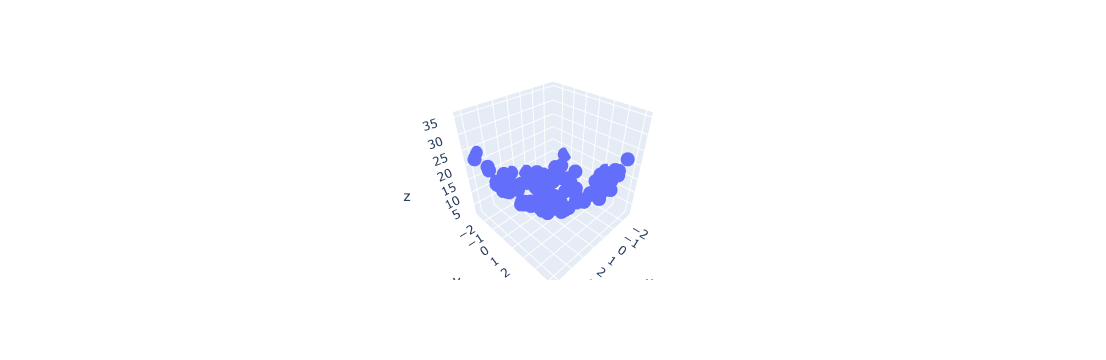

In [112]:
import plotly.express as px
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [120]:
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100, 2), z)

LinearRegression()

In [124]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

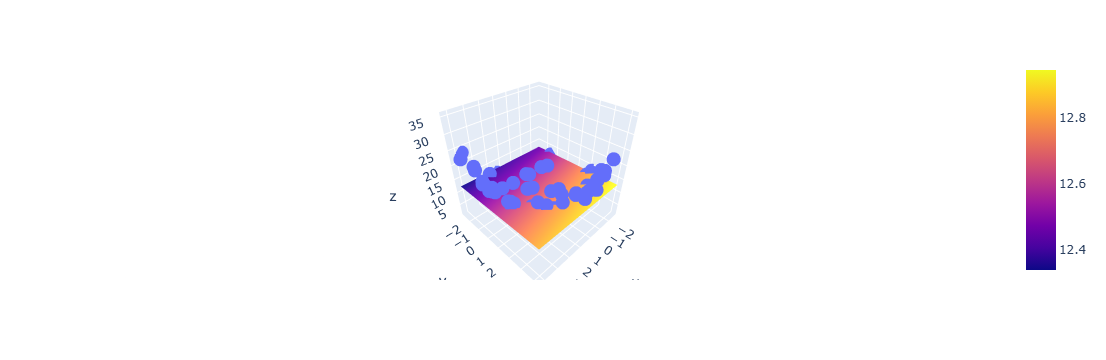

In [125]:
import plotly.graph_objects as go
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))
fig.show()

In [126]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [128]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [131]:
print("Input",poly.n_features_in_)
print("Ouput",poly.get_feature_names_out())
print("Powers\n",poly.powers_)

Input 2
Ouput ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [135]:
X_multi_trans.shape

(100, 6)

In [139]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [140]:
X_test_multi = poly.transform(final)

In [141]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

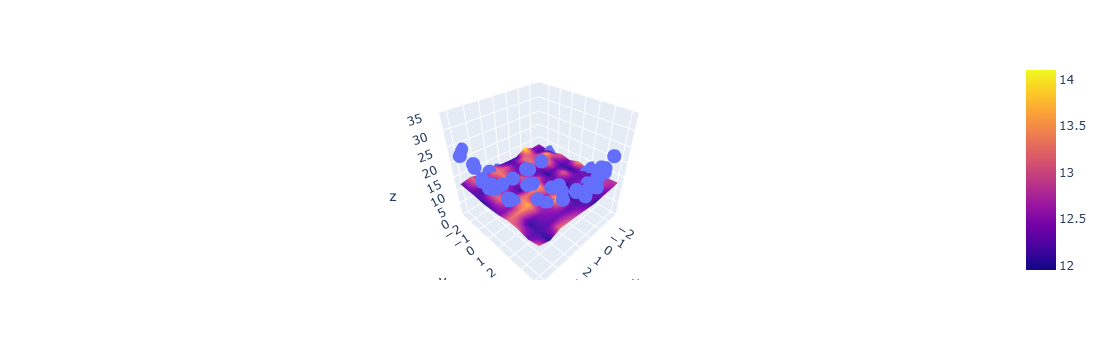

In [142]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
fig.show()